In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
df = pd.read_csv('/content/malaria_infection.csv', encoding='ISO-8859-1')
df.head(10)

,Country,Year,No. of cases,No. of deaths,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,WHO Region
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean
1,Algeria,2017,0,0,0,NaN,NaN,0,NaN,NaN,Africa
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa
3,Argentina,2017,0,0,0,NaN,NaN,0,NaN,NaN,Americas
4,Armenia,2017,0,0,0,NaN,NaN,0,NaN,NaN,Europe
5,Azerbaijan,2017,0,0,0,NaN,NaN,0,NaN,NaN,Europe
6,Bangladesh,2017,32924[30000-36000],76[3-130],32924,30000.0,36000.0,76,3.0,130.0,South-East Asia
7,Belize,2017,7,0,7,NaN,NaN,0,NaN,NaN,Americas
8,Benin,2017,4111699[2774000-6552000],7328[5740-8920],4111699,2774000.0,6552000.0,7328,5740.0,8920.0,Africa
9,Bhutan,2017,11,0,11,NaN,NaN,0,NaN,NaN,South-East Asia


In [3]:
df_cleaned = df.drop_duplicates()

In [5]:
# Summary stats
df.describe()

,Year,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max
count,856.000000,8.560000e+02,5.440000e+02,5.440000e+02,856.000000,524.000000,524.000000
mean,2013.500000,2.081990e+06,2.157556e+06,4.913741e+06,4713.880841,5619.108779,10149.429389
std,2.292627,6.381892e+06,5.384822e+06,1.102773e+07,13183.312889,12823.714240,20173.783933
min,2010.000000,0.000000e+00,3.000000e+01,4.000000e+01,0.000000,0.000000,1.000000
25%,2011.750000,2.385000e+02,3.900000e+04,7.500000e+04,0.000000,5.000000,180.000000
50%,2013.500000,3.752100e+04,4.980000e+05,1.389000e+06,55.500000,390.000000,3565.000000
75%,2015.250000,1.656628e+06,2.084500e+06,5.277750e+06,4096.000000,6592.500000,12400.000000
max,2017.000000,6.202089e+07,4.388000e+07,8.484000e+07,146734.000000,115000.000000,179000.000000


In [6]:
# Data type info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               856 non-null    object 
 1   Year                  856 non-null    int64  
 2   No. of cases          856 non-null    object 
 3   No. of deaths         856 non-null    object 
 4   No. of cases_median   856 non-null    int64  
 5   No. of cases_min      544 non-null    float64
 6   No. of cases_max      544 non-null    float64
 7   No. of deaths_median  856 non-null    int64  
 8   No. of deaths_min     524 non-null    float64
 9   No. of deaths_max     524 non-null    float64
 10  WHO Region            856 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 73.7+ KB


In [7]:
df.dropna(inplace=True)

In [8]:
# check for remaining null values
df.isnull().sum()

,0
Country,0
Year,0
No. of cases,0
No. of deaths,0
No. of cases_median,0
No. of cases_min,0
No. of cases_max,0
No. of deaths_median,0
No. of deaths_min,0
No. of deaths_max,0


In [9]:
# Convert columns to numeric types
df['No. of cases_median'] = pd.to_numeric(df['No. of cases_median'], errors='coerce')
df['No. of deaths_median'] = pd.to_numeric(df['No. of deaths_median'], errors='coerce')

# Convert WHO Region to categorical data
df['WHO Region'] = df['WHO Region'].astype('category')

In [10]:
# new column for case-fatality ratio
df['case_fatality_ratio'] = df['No. of deaths_median'] / df['No. of cases_median']
df.head()

,Country,Year,No. of cases,No. of deaths,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,WHO Region,case_fatality_ratio
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean,0.000473
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa,0.002885
6,Bangladesh,2017,32924[30000-36000],76[3-130],32924,30000.0,36000.0,76,3.0,130.0,South-East Asia,0.002308
8,Benin,2017,4111699[2774000-6552000],7328[5740-8920],4111699,2774000.0,6552000.0,7328,5740.0,8920.0,Africa,0.001782
10,Bolivia (Plurinational State of),2017,6512[4900-8300],2[0-4],6512,4900.0,8300.0,2,0.0,4.0,Americas,0.000307


In [11]:
# log transformation to cases and deaths
df['log_cases'] = df['No. of cases_median'].apply(lambda x: np.log(x + 1))
print(df[['No. of cases_median', 'log_cases']])

     No. of cases_median  log_cases
0                 630308  13.353965
2                4615605  15.344954
6                  32924  10.401988
8                4111699  15.229347
10                  6512   8.781555
..                   ...        ...
851                57257  10.955323
852                23062  10.045985
853              1134927  13.942080
854              2169307  14.589919
855              1095083  13.906342

[509 rows x 2 columns]


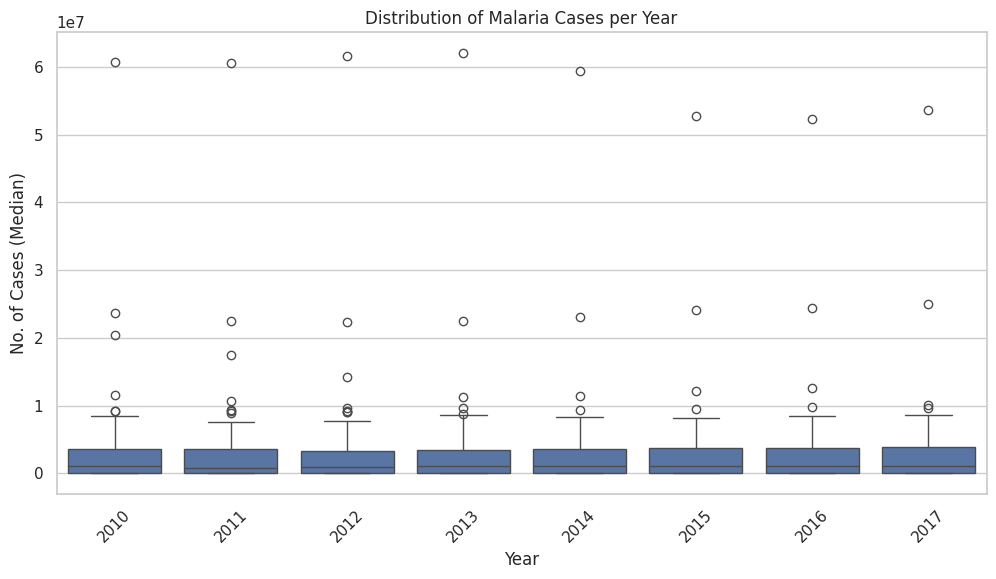

In [38]:
sns.set_style("whitegrid")

# Malaria Cases per Year
plt.figure(figsize=(12, 6))
sns.boxplot(x="Year", y="No. of cases_median", data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Malaria Cases per Year")
plt.xlabel("Year")
plt.ylabel("No. of Cases (Median)")
plt.show()


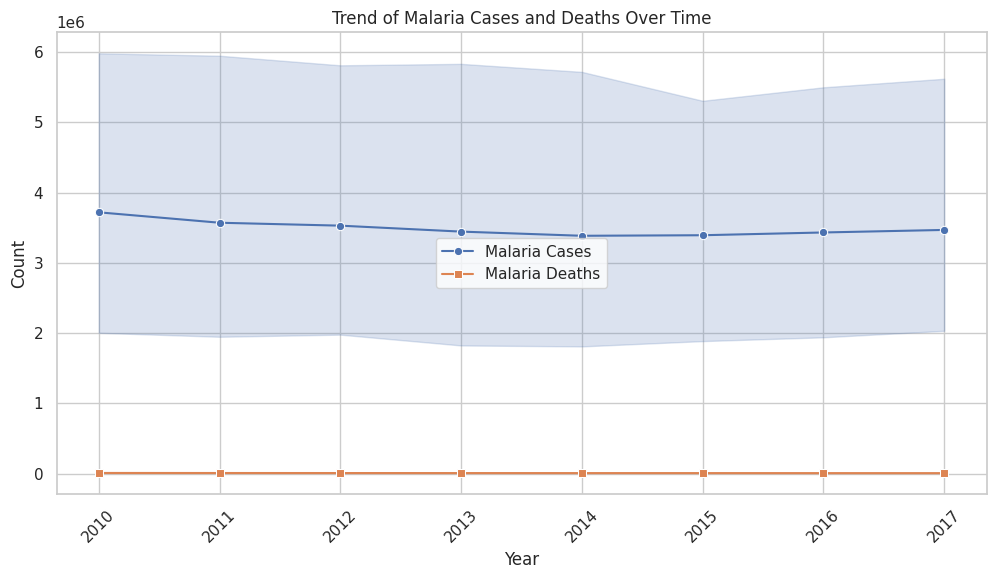

In [42]:
# Set Seaborn style
sns.set_style("whitegrid")

# malaria cases and deaths over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="No. of cases_median", data=df, marker="o", label="Malaria Cases")
sns.lineplot(x="Year", y="No. of deaths_median", data=df, marker="s", label="Malaria Deaths")

plt.title("Trend of Malaria Cases and Deaths Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation=45)
plt.show()

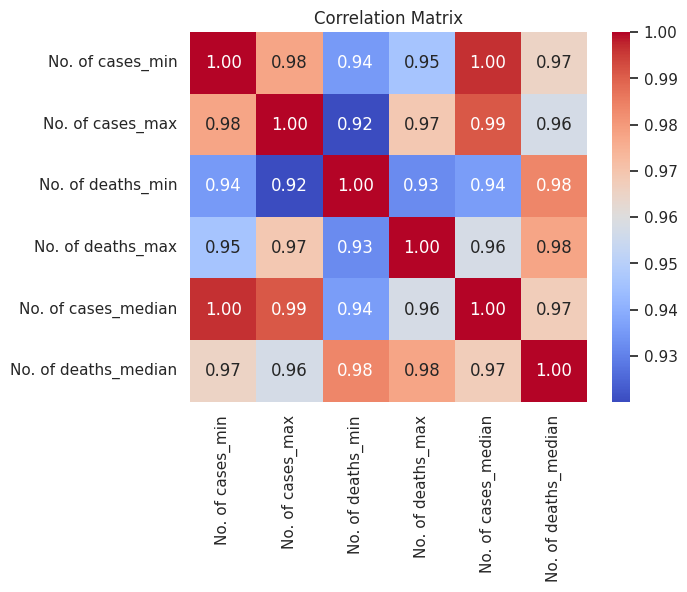

In [43]:
columns_to_plot = ['No. of cases_min', 'No. of cases_max', 'No. of deaths_min', 'No. of deaths_max', 'No. of cases_median', 'No. of deaths_median']
corr_matrix = df[columns_to_plot].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



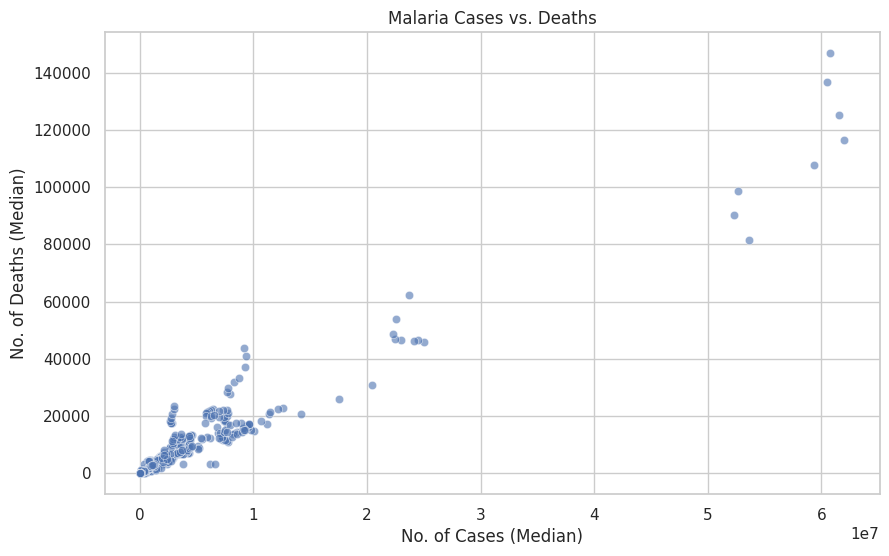

In [44]:
# Scatter plot for malaria cases vs. deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(x="No. of cases_median", y="No. of deaths_median", data=df, alpha=0.6)
plt.title("Malaria Cases vs. Deaths")
plt.xlabel("No. of Cases (Median)")
plt.ylabel("No. of Deaths (Median)")
plt.show()

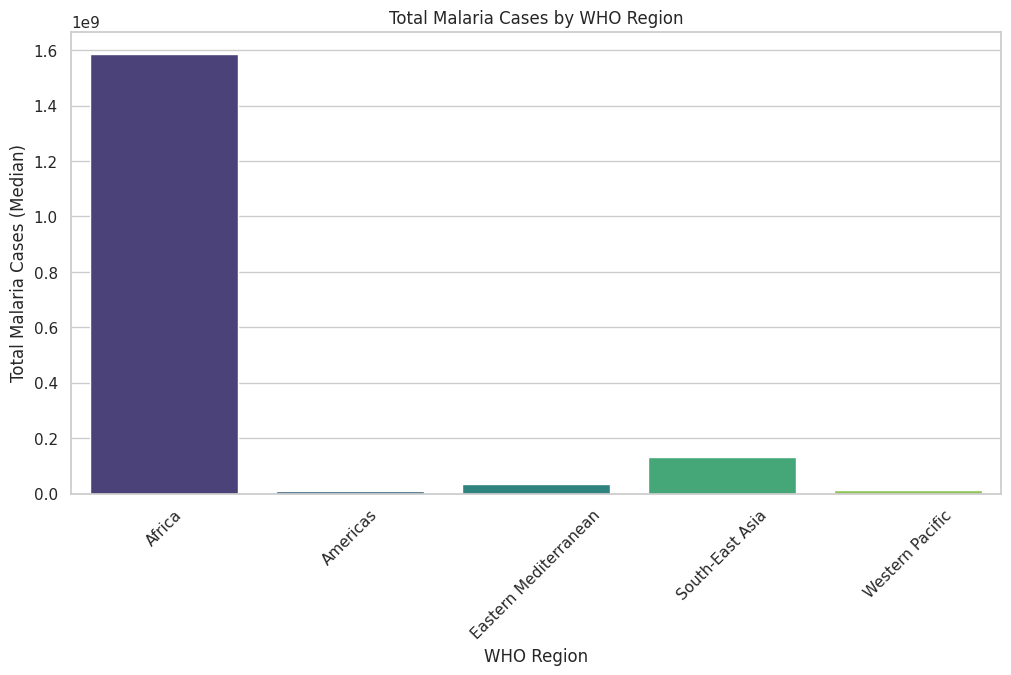

In [46]:
# Aggregate data
df_region = df.groupby("WHO Region", observed=False)["No. of cases_median"].sum().reset_index()

# malaria cases by WHO Region
plt.figure(figsize=(12, 6))
sns.barplot(x="WHO Region", y="No. of cases_median", data=df_region, hue="WHO Region", palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.title("Total Malaria Cases by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Total Malaria Cases (Median)")
plt.show()

In [33]:
from scipy.stats import pearsonr

# Extract the relevant columns
cases = df['No. of cases_median']
deaths = df['No. of deaths_median']

# Pearson's correlation test
corr, p_value = pearsonr(cases, deaths)

print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between cases and deaths.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between cases and deaths.")


Pearson correlation coefficient: 0.9674687518276763
P-value: 8.657633832091299e-305
Reject the null hypothesis. There is a significant relationship between cases and deaths.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>